In [1]:
import pandas as pd
import numpy as np
import configs.config as cfg

import matplotlib.pyplot as plt

In [7]:
seed = cfg.seed

data_path = "../../datasets/amazon_review_data/hybrid_data/hybrid_5_title.csv"

In [10]:
df = pd.read_csv(data_path, sep='\t')

# 创建场景字典
scenario_dict = {
    0: 'Amazon Fashion', 
    1: 'Digital Music', 
    2: 'Musical Instruments', 
    3: 'Gift Cards', 
    4: 'All Beauty'
}

# Count the number of samples for each scenario
sample_counts = df['scenario'].value_counts().sort_index().rename(index=scenario_dict)
sample_counts

scenario
Amazon Fashion          873872
Digital Music           164432
Musical Instruments    1511371
Gift Cards              147137
All Beauty              366029
Name: count, dtype: int64

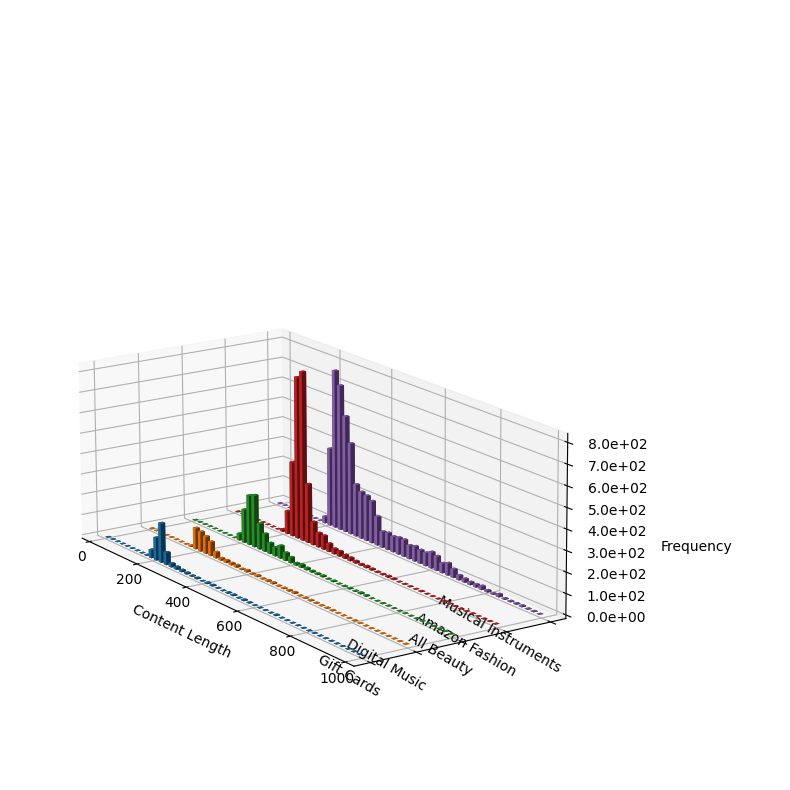

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FixedLocator

# 创建场景字典
scenario_dict = {
    0: 'Amazon Fashion',
    1: 'Digital Music',
    2: 'Musical Instruments',
    3: 'Gift Cards',
    4: 'All Beauty'
}

# 加载数据
def load_data(file_path):
    return pd.read_csv(
        file_path, 
        sep='\t'
    )

# 计算字符串长度
def calculate_content_length(data):
    data['content_length'] = data['content'].apply(len)
    return data


def plot_combined_distribution_3d(data, scenarios, colors, save_path, x_min, x_max):
    n = 3
    fig = plt.figure(figsize=(n * 3, n * 2))
    ax = fig.add_subplot(111, projection='3d')
    
    # 仅选择落在新的x轴范围内的数据点
    data = data[(data['content_length'] >= x_min) & (data['content_length'] <= x_max)]
    bins = np.linspace(x_min, x_max, 50)  # 重新计算bins以匹配新的x_min
    bin_width = bins[1] - bins[0]  # 计算bins宽度
    
    # 计算直方图数据
    hist_data = [np.histogram(data[data['scenario'] == scenario]['content_length'], bins=bins) for scenario in scenarios]
    
    # 设置每个场景的柱状图的位置
    xpos = bins[:-1] + bin_width / 2  # 中心对齐
    ypos = np.arange(len(scenarios))
    xpos, ypos = np.meshgrid(xpos, ypos)

    xpos = xpos.flatten()
    ypos = ypos.flatten() * 2   # 控制场景之间的间隔
    zpos = np.zeros_like(xpos)
    
    # 设置柱状图的宽度和高度
    dx = bin_width * 0.5  # 柱体的宽度稍微小于bin宽度
    dy = 0.2  # 每个场景的宽度

    # 绘制柱状图
    for idx, (counts, _) in enumerate(hist_data):
        ax.bar3d(xpos[idx * len(bins[:-1]):(idx + 1) * len(bins[:-1])], 
                 ypos[idx * len(bins[:-1]):(idx + 1) * len(bins[:-1])], 
                 zpos[idx * len(bins[:-1]):(idx + 1) * len(bins[:-1])], 
                 dx, dy, counts, color=colors[idx], zsort='max')
    
    # 设置图表的标题和坐标轴标签
    ax.set_xlabel('Content Length')
    # 设置标签加粗并水平
    # ax.zaxis.label.set_fontweight('bold')
    ax.set_zlabel('Frequency', labelpad=30)
    
    # 设置y轴的标签为场景名称
    ax.set_yticks(ypos[::len(bins[:-1])] + dy / 2)
    ax.set_yticklabels([scenario_dict[scenario] for scenario in scenarios], va='center', ha='left')
    
    # 设置x轴的显示范围
    ax.set_xlim([x_min - bin_width / 2, x_max + bin_width / 2])
    
    # 设置z轴的刻度位置
    ax.set_zticklabels([f'{tick:.1e}' for tick in ax.get_zticks()], va='center', ha='left')
    
    # 保存并显示图像
    plt.savefig(save_path, format='pdf')
    plt.show()

# 主函数，整合以上步骤
def main(file_path, save_path, x_min, x_max):
    data = load_data(file_path)
    data = calculate_content_length(data)
    scenarios = [3, 1, 4, 0, 2]  # 按照场景的顺序指定颜色
    colors = ['#1f77b4',  # 深蓝色
              '#ff7f0e',  # 橙色
              '#2ca02c',  # 绿色
              '#d62728',  # 红色
              '#9467bd']  # 紫色

    plot_combined_distribution_3d(data, scenarios, colors, save_path, x_min, x_max)

# 设置文件路径和保存路径
file_path = "../../datasets/amazon_review_data/hybrid_data/hybrid_5_title.csv"  # 这里填写您数据集的路径
save_path = 'path_to_save_plot.pdf'  # 这里填写您希望保存图表的路径

# 设置x轴的范围
x_min = 128
x_max = 1024

# 运行主函数
main(file_path, save_path, x_min, x_max)


In [20]:
df = pd.read_csv(data_path, sep='\t')

df['label'] = df['rating']
df = df.drop(df[df['overall'] == 3].index).reset_index()

# 按照时间顺序排序
df = df.sort_values(by='unixReviewTime', ascending=True)

text_data_scene = [df[df['scenario'] == i] for i in range(5)]
train_text_scene = [i.iloc[:int(len(i) * 0.9)].copy() for i in text_data_scene]
test_text_scene = [i.iloc[int(len(i) * 0.9):].copy() for i in text_data_scene]
valid_text_scene = [i.iloc[int(len(i) * 0.9):].copy() for i in train_text_scene]
train_text_scene = [i.iloc[:int(len(i) * 0.9)].copy() for i in train_text_scene]

train = pd.concat(train_text_scene)
valid = pd.concat(valid_text_scene)
test = pd.concat(test_text_scene)

In [14]:
# choose scenario 1 from train and get num of samples
train_scenario1 = train[train['scenario'] == 0]
print(len(train_scenario1))

629778


In [21]:
for i in [train, valid, test]:
    # choose scenarios from data and get num of samples
    for j in range(5):
        print(len(i[i['scenario'] == j]))

629778
126290
1138211
116753
272629
69976
14033
126468
12973
30293
77751
15592
140520
14415
33658


In [47]:
# 计算每个'content'文本的长度
train['content_length'] = train['content'].apply(len)

# 查看基本统计数据
print(train['content_length'].describe())

count    1.892492e+06
mean     5.624379e+02
std      4.474598e+03
min      1.820000e+02
25%      2.470000e+02
50%      2.750000e+02
75%      3.380000e+02
max      4.782620e+05
Name: content_length, dtype: float64


In [48]:
# 按照'content_length'列的值对DataFrame进行降序排序
sorted_train = train.sort_values(by='content_length', ascending=False)

In [49]:
# 输出最长的100个数据的'content_length'值
top_100_lengths = sorted_train['content_length'].head(7725)
print(top_100_lengths)

1358597    478262
24593      422718
24592      422645
2657083    422620
393237     422582
            ...  
1794555     53842
1733748     39840
2127958      1924
1631092      1583
761127       1373
Name: content_length, Length: 7725, dtype: int64


In [55]:
print(sorted_train.iloc[7721]['content'])

Amazon Fashion: The user ID is user_1286897, who clicked nothing recently. The ID of current product is product_141082, the title is 'var aPageStart = (new Date()).getTime(); var ue_t0=ue_t0||+new Date(); window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1; if (window.ue_ihb === 1) { var ue_csm = window, ue_hob = +new Date(); (function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){if(1==window.ueinit)try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm); var ue_err_chan = 'jserr-rw'; (function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c!==n&&c!==p||a.ec++;c&&c!=k||a.ecf++;

In [ ]:
# 绘制长度分布的直方图
plt.figure(figsize=(10, 6))
plt.hist(train['content_length'], bins=50, alpha=0.5, color='g', label='Word Count')
plt.xlabel('Length of Content')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Content Length')
plt.grid(True)
plt.show()